In [1]:
import pandas as pd
df = pd.read_csv('d:/data/project/project_GDP.csv', header=0, index_col=0,encoding='CP949', squeeze=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1959 to 2020
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   아시아      62 non-null     float64
 1   한국       62 non-null     int64  
 2   이스라엘     37 non-null     float64
 3   일본       61 non-null     float64
 4   터키       62 non-null     int64  
 5   북아메리카    62 non-null     float64
 6   캐나다      62 non-null     int64  
 7   멕시코      62 non-null     int64  
 8   미국       62 non-null     int64  
 9   남아메리카    62 non-null     float64
 10  칠레       62 non-null     int64  
 11  콜롬비아     62 non-null     int64  
 12  코스타리카    62 non-null     int64  
 13  유럽       62 non-null     float64
 14  오스트리아    62 non-null     int64  
 15  벨기에      62 non-null     int64  
 16  체코       32 non-null     float64
 17  덴마크      56 non-null     float64
 18  에스토니아    27 non-null     float64
 19  핀란드      62 non-null     int64  
 20  프랑스      62 non-null     int64  
 21  독일       52 n

C:\Users\tjoeun707\AppData\Local\Temp\ipykernel_13548\54112801.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('d:/data/project/project_GDP.csv', header=0, index_col=0,encoding='CP949', squeeze=True)


In [2]:
df_check = df.isnull()
print(df_check.head()) #NAN체크 있으면 true 없으면 False
check_for_nan = df.isnull().sum().sum()
print('NAN개수:'+str(check_for_nan))#NAN 개수확인

        아시아     한국   이스라엘     일본     터키  북아메리카    캐나다    멕시코     미국  남아메리카  \
시점                                                                           
1959  False  False  False  False  False  False  False  False  False  False   
1960  False  False  False  False  False  False  False  False  False  False   
1961  False  False  False  False  False  False  False  False  False  False   
1962  False  False  False  False  False  False  False  False  False  False   
1963  False  False  False  False  False  False  False  False  False  False   

      ...  슬로바키아  슬로베니아    스페인    스웨덴    스위스     영국  오세아니아  오스트레일리아   뉴질랜드  \
시점    ...                                                                    
1959  ...  False  False  False  False  False  False  False    False  False   
1960  ...   True   True  False  False  False  False  False    False  False   
1961  ...   True   True  False  False  False  False  False    False  False   
1962  ...   True   True  False  False  False  False  False    F

In [3]:
df =df.fillna(method='ffill')

<AxesSubplot:xlabel='시점'>

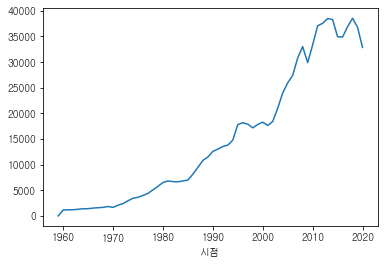

In [4]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
df['세계'].plot()

d:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


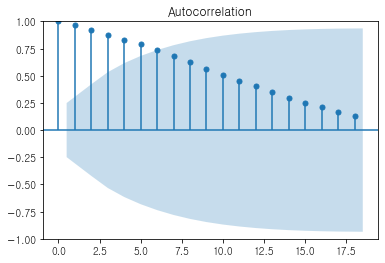

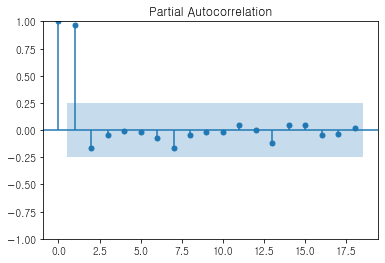

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['세계'])
plot_pacf(df['세계'], method='ywm')
plt.show()

In [6]:
from pmdarima.arima import auto_arima
model=auto_arima(df['세계'],suppress_warnings=True)
model 

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [7]:
n=int(df.shape[0]*.8)
train=df[:n]
test=df[n:]

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.arima.ARIMA(df['세계'], order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     세계   No. Observations:                   62
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -515.364
Date:                Fri, 24 Jun 2022   AIC                           1038.729
Time:                        16:16:34   BIC                           1047.106
Sample:                             0   HQIC                          1042.006
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1570      0.103      1.528      0.127      -0.044       0.358
ar.L2         -0.4429      0.164     -2.704      0.007      -0.764      -0.122
ma.L1         -0.7088      0.127     -5.598      0.0

d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


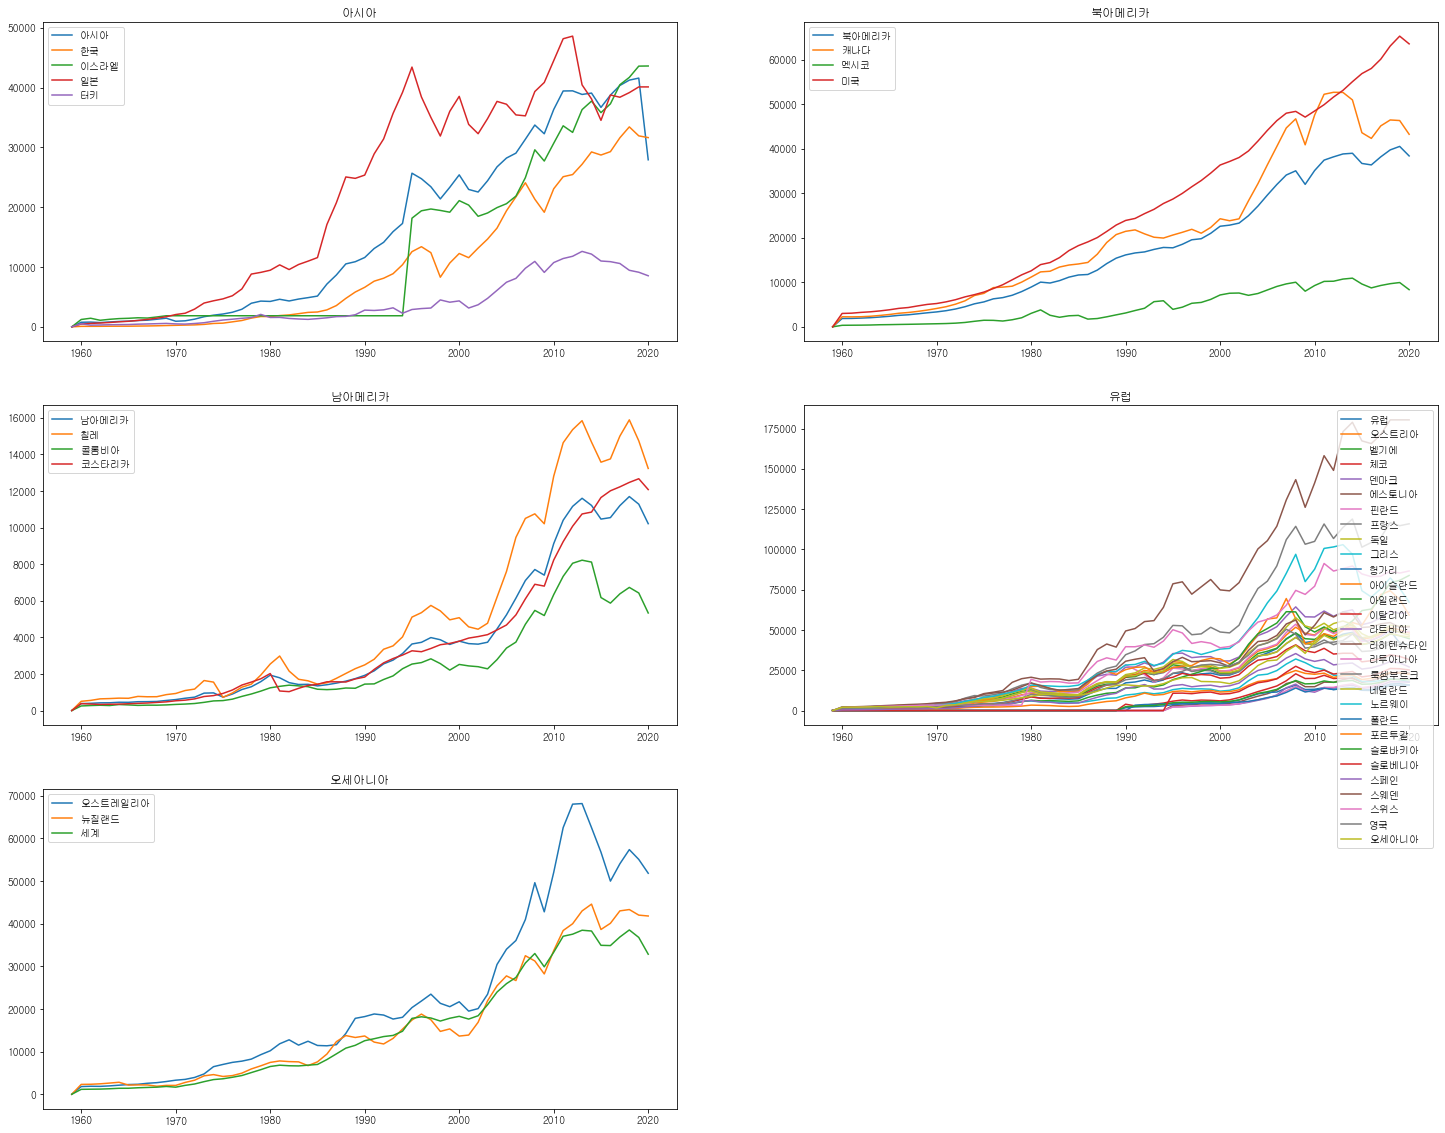

In [9]:
plt.figure(figsize=(25, 20))
plt.subplot(321)
plt.plot(df.iloc[:,0:5])
plt.title('아시아')
plt.legend(df.iloc[:,0:5])
plt.subplot(322)
plt.plot(df.iloc[:,5:9])
plt.title('북아메리카')
plt.legend(df.iloc[:,5:9])
plt.subplot(323)
plt.plot(df.iloc[:,9:13])
plt.title('남아메리카')
plt.legend(df.iloc[:,9:13])
plt.subplot(324)
plt.plot(df.iloc[:,13:-3])
plt.title('유럽')
plt.legend(df.iloc[:,13:-3])
plt.subplot(325)
plt.plot(df.iloc[:,-3:])
plt.title('오세아니아')
plt.legend(df.iloc[:,-3:])

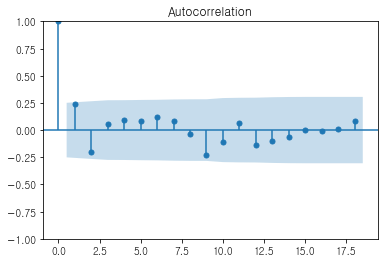

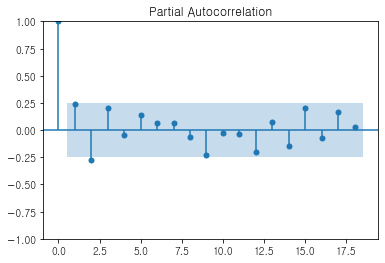

In [10]:
#차분후
diff_1=df.diff(periods=1).iloc[1:]
plot_acf(diff_1['세계'])
plot_pacf(diff_1['세계'],method='ywm')
plt.show()

<AxesSubplot:xlabel='시점'>

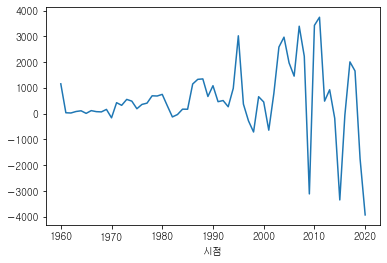

In [11]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
diff_1['세계'].plot()

In [12]:
from pmdarima.arima import auto_arima
model_d=auto_arima(diff_1['세계'],suppress_warnings=True)
model_d 

ARIMA(order=(0, 0, 2), scoring_args={}, suppress_warnings=True)

In [13]:
n_d=int(diff_1.shape[0]*.8)
train_d=diff_1[:n]
test_d=diff_1[n:]

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

model_d = sm.tsa.arima.ARIMA(diff_1['세계'], order=(2,1,3))
model_fit_d = model_d.fit()
print(model_fit_d.summary())


                               SARIMAX Results                                
Dep. Variable:                     세계   No. Observations:                   61
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -514.613
Date:                Fri, 24 Jun 2022   AIC                           1041.227
Time:                        17:11:31   BIC                           1053.793
Sample:                             0   HQIC                          1046.142
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3031      0.357      0.848      0.396      -0.397       1.004
ar.L2         -0.2220      0.409     -0.543      0.587      -1.023       0.579
ma.L1         -0.7942      0.368     -2.156      0.0

d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
d:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [25]:
model.plot_diagnostics(figsize =(16,8))
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

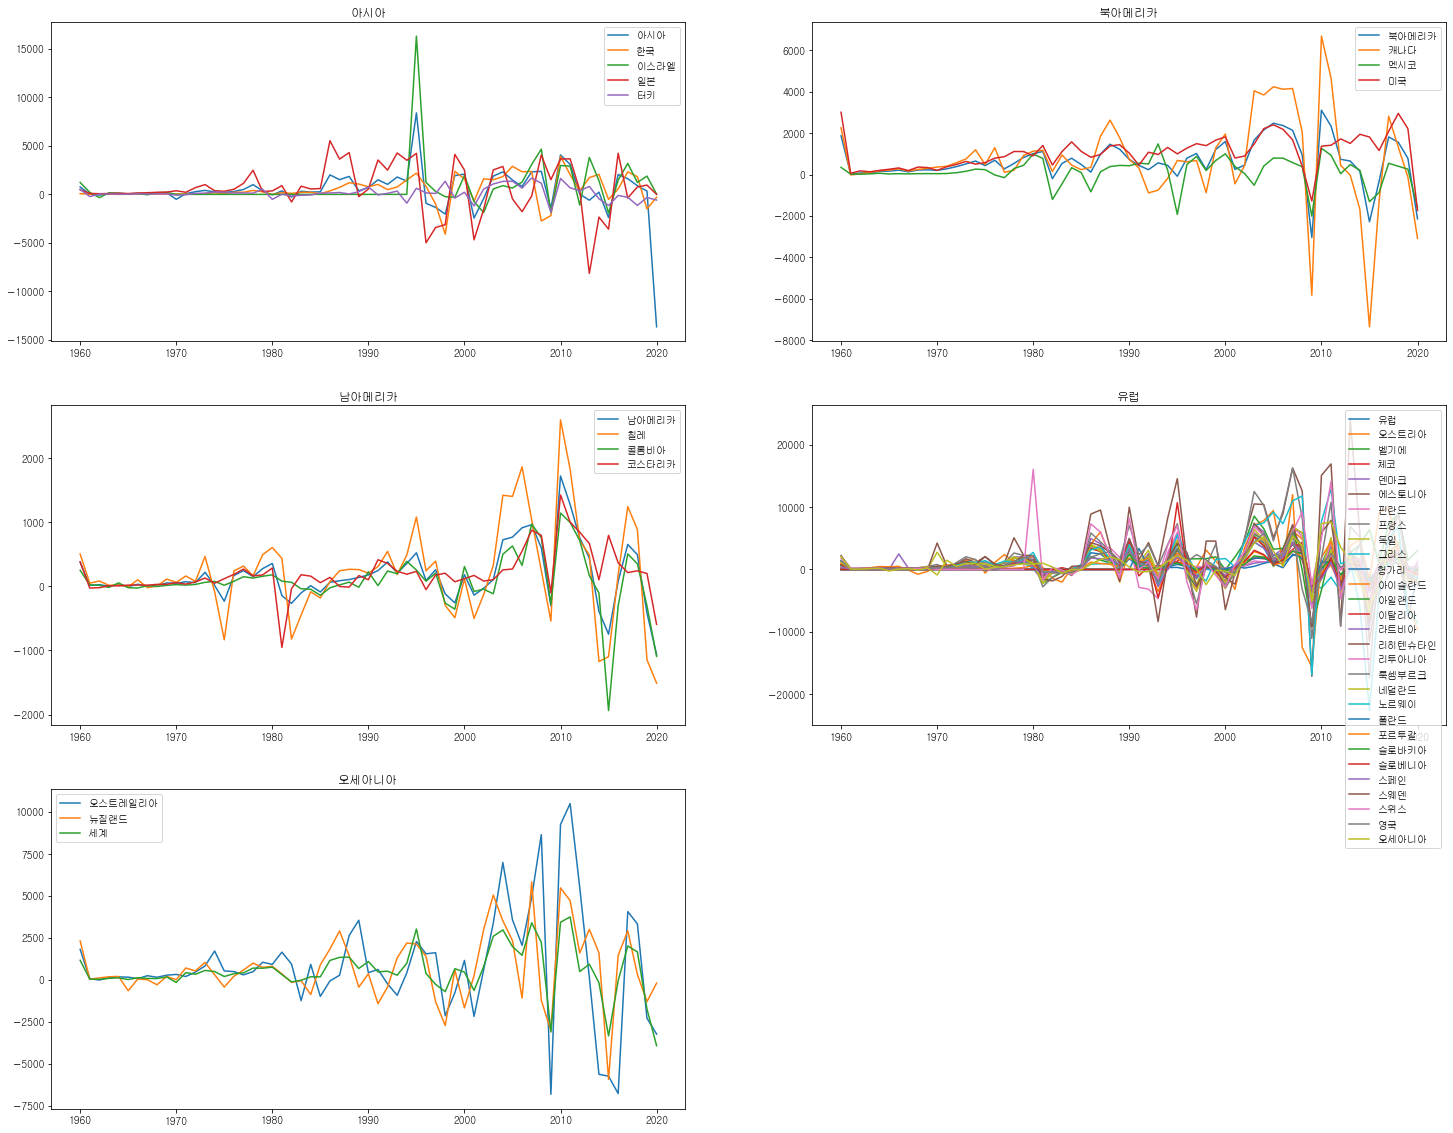

In [15]:
plt.figure(figsize=(25, 20))
plt.subplot(321)
plt.plot(diff_1.iloc[:,0:5])
plt.title('아시아')
plt.legend(diff_1.iloc[:,0:5])
plt.subplot(322)
plt.plot(diff_1.iloc[:,5:9])
plt.title('북아메리카')
plt.legend(diff_1.iloc[:,5:9])
plt.subplot(323)
plt.plot(diff_1.iloc[:,9:13])
plt.title('남아메리카')
plt.legend(diff_1.iloc[:,9:13])
plt.subplot(324)
plt.plot(diff_1.iloc[:,13:-3])
plt.title('유럽')
plt.legend(diff_1.iloc[:,13:-3])
plt.subplot(325)
plt.plot(diff_1.iloc[:,-3:])
plt.title('오세아니아')
plt.legend(diff_1.iloc[:,-3:])

In [32]:
from statsmodels.tsa.stattools import adfuller 
import numpy as np 
diff1=np.log(df['아이슬란드']).diff(periods=1).iloc[2:]
result=adfuller(diff1)
print(result[1])

2.3553362004622434e-06


d:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
fore=model.forecast(steps=5)
print(fore)

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [ ]:

model.plot_predict()
plt.show()

In [35]:
fc,se,conf=model.forecast(steps=len(test))
fc_series=pd.Series(fc,index=test.index)
lower=pd.Series(conf[:,0],index=test.index)
upper=pd.Series(conf[:,1],index=test.index)
plt.plot(df['세계'],label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=0.15)
plt.title('forecast vs actuals')
plt.legend(loc='upper left',fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'forecast'